In [1]:
import csv
from math import isnan

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Constants

In [2]:
grid_results_fname = 'local_search_grid_dataframe.out'
bcc_results_fname = 'local_search_bcc_dataframe.out'
NUM_BOX_SIZES = 5
BOX_SIZES = [10, 15, 20, 25, 30]
CUBE_SIZES = [box_size**3 for box_size in BOX_SIZES]
GEOGRAPH_STATUS_TO_INDEX = {'fail_1': 0, 'fail_2': 1, 'fail_3': 2, 'fail_4': 3, 'fail_5': 4, 'success': 5}
BFS_STATUS_TO_INDEX = {'failure': 0, 'success': 1}

# Plotting parameters
MARKER_SIZE = 12
point_markers = ["s", "P", "^", "x", "+", "D", ">", "*", "v", "o"]
plt.rcParams['font.size'] = '18'

## Seaborn setup

In [59]:
sns.set_context("paper", font_scale=1.5, rc={"font.family": "sans-serif", "font.sans-serif": ["Helvetica", "DejaVu Sans", "Arial", "sans-serif"]})
sns.set_palette(sns.xkcd_palette(colors=["navy", "grey"]))

# Grid (Cubic Honeycomb) Results

## Load data

In [4]:
grid_df = pd.read_csv(grid_results_fname)
print(len(grid_df))
grid_df["number of cells"] = grid_df["number of cells"] / 1000.
unique_cell_counts = np.unique(grid_df["number of cells"])
grid_df.head()

40


,number of cells,flip type,status,average microseconds,number of samples
0,1.0,geograph3d,fail_1,114.457,3951
1,1.0,geograph3d,fail_2,NaN,0
2,1.0,geograph3d,fail_3,153.399,213
3,1.0,geograph3d,fail_4,155.943,297
4,1.0,geograph3d,fail_5,160.473,419


In [5]:
df2 = grid_df.copy()
df2["flip result"] = df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
df2["total microseconds"] = df2["average microseconds"] * df2["number of samples"]
df2.head()

,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,1.0,geograph3d,fail_1,114.457,3951,failure,452219.607
1,1.0,geograph3d,fail_2,NaN,0,failure,NaN
2,1.0,geograph3d,fail_3,153.399,213,failure,32673.987
3,1.0,geograph3d,fail_4,155.943,297,failure,46315.071
4,1.0,geograph3d,fail_5,160.473,419,failure,67238.187


In [6]:
df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)"}, \
           inplace=True)
df3 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
df3["CPU Time (microseconds)"] = df3["total microseconds"] / df3["number of samples"]
df3.drop(columns=["total microseconds"], inplace=True)
df3.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                             
1.000                       bfs        failure                11.652900   
                                       success                 6.798700   
                            geograph3d failure               122.632552   
                                       success               211.352000   
3.375                       bfs        failure                37.471400   
                                       success                15.002500   
                            geograph3d failure               128.243076   
                                       success               222.955000   
8.000                       bfs        failure                94.704700   
                                       success                28.156000   
                            geograph3d failure               133.275040   
                                       success               233.554000   
15.625                      bfs        failure               177.266000   
                                       success                48.961800   
                            geograph3d failure               137.874655   
                                       success               245.828000   
27.000                      bfs        failure               320.809000   
                                       success                76.012200   
                            geograph3d failure               137.322737   
                                       success               244.993000   

                                                number of samples  
Number of Cells (thousands) Flip Type  Status                      
1.000                       bfs        failure               1550  
                                       success               8450  
                            geograph3d failure               4880  
                                       success               5120  
3.375                       bfs        failure               3494  
                                       success              30256  
                            geograph3d failure              16023  
                                       success              17727  
8.000                       bfs        failure               7236  
                                       success              72764  
                            geograph3d failure              39050  
                                       success              40950  
15.625                      bfs        failure              14151  
                                       success             142099  
                            geograph3d failure              77230  
                                       success              79020  
27.000                      bfs        failure              22963  
                                       success             247037  
                            geograph3d failure             130576  
                                       success             139424

## Plot execution time vs. number of cells

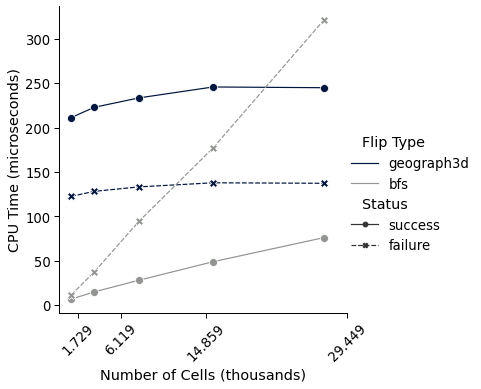

In [62]:
g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Status", style_order=["success", "failure"], kind="line", markers=True, markersize=8, data=df3);
fig = plt.gcf()
axes = np.array(g.axes.flat)
for ax in axes:
    ax.set_xticks(unique_cell_counts)
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
# fig.set_size_inches(8, 4)
plt.savefig("ch_results_plot.png", dpi=300, bbox_inches="tight")

# BCC Results

## Load data

In [31]:
bch_df = pd.read_csv(bcc_results_fname)
print(len(bch_df))
bch_df["number of cells"] = bch_df["number of cells"] / 1000.
unique_cell_counts = np.unique(bch_df["number of cells"])
bch_df.head()

32


,number of cells,flip type,status,average microseconds,number of samples
0,1.729,geograph3d,fail_1,209.621,9954
1,1.729,geograph3d,fail_2,NaN,0
2,1.729,geograph3d,fail_3,292.862,4213
3,1.729,geograph3d,fail_4,271.728,169
4,1.729,geograph3d,fail_5,214.312,16


In [32]:
bch_df2 = bch_df.copy()
bch_df2["flip result"] = bch_df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
bch_df2["total microseconds"] = bch_df2["average microseconds"] * bch_df2["number of samples"]
bch_df2.head()

,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,1.729,geograph3d,fail_1,209.621,9954,failure,2086567.434
1,1.729,geograph3d,fail_2,NaN,0,failure,NaN
2,1.729,geograph3d,fail_3,292.862,4213,failure,1233827.606
3,1.729,geograph3d,fail_4,271.728,169,failure,45922.032
4,1.729,geograph3d,fail_5,214.312,16,failure,3428.992


In [33]:
bch_df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)"}, \
           inplace=True)
bch_df3 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
bch_df3["CPU Time (microseconds)"] = bch_df3["total microseconds"] / bch_df3["number of samples"]
bch_df3.drop(columns=["total microseconds"], inplace=True)
bch_df3.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                             
1.729                       bfs        failure                37.385400   
                                       success                12.286500   
                            geograph3d failure               234.792786   
                                       success               374.157000   
6.119                       bfs        failure               242.901000   
                                       success                33.108300   
                            geograph3d failure               252.746087   
                                       success               415.156000   
14.859                      bfs        failure               747.702000   
                                       success                74.658300   
                            geograph3d failure               262.667817   
                                       success               443.995000   
29.449                      bfs        failure              1900.860000   
                                       success               146.415000   
                            geograph3d failure               281.866386   
                                       success               480.142000   

                                                number of samples  
Number of Cells (thousands) Flip Type  Status                      
1.729                       bfs        failure                659  
                                       success              16631  
                            geograph3d failure              14352  
                                       success               2938  
6.119                       bfs        failure               1598  
                                       success              59592  
                            geograph3d failure              56448  
                                       success               4742  
14.859                      bfs        failure               1496  
                                       success             147094  
                            geograph3d failure             140264  
                                       success               8326  
29.449                      bfs        failure               1705  
                                       success             292785  
                            geograph3d failure             280557  
                                       success              13933

## Plot CPU Time vs. Number of Cells

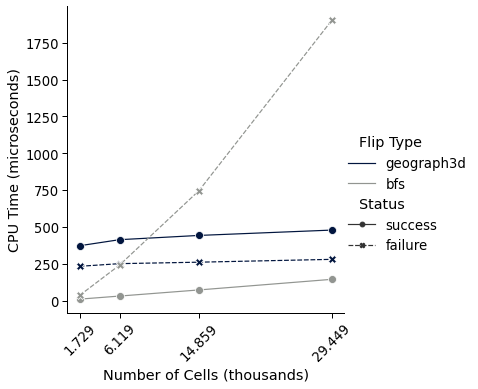

In [64]:
g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Status", style_order=["success", "failure"], kind="line", markers=True, markersize=8, data=bch_df3);
fig = plt.gcf()
axes = np.array(g.axes.flat)
for ax in axes:
    ax.set_xticks(unique_cell_counts)
    # Uncomment below if x tick labels need rotation
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
# fig.set_size_inches(8, 4)
plt.savefig("bch_results_plot.png", dpi=300, bbox_inches="tight")